### <b>Part IV : Sentiment analysis using LSTM</b>

In this part, we perform a sentiment analysis using LSTM model. The expected accuracy for this part is more than <b>`75%`</b> for the final model.

#### <b>DATASETS</b><br>
Choose ONE dataset from the following options for sentiment analysis:<br>
    • `Amazon Product Reviews Dataset`: reviews of various products sold on Amazon, labeled with sentiment.<br>
    • `Yelp Reviews Dataset`: reviews from the Yelp platform, labeled with sentiment<br>
    • `Twitter Airline Sentiment Dataset`: tweets about airline experiences, labeled with sentiment.<br>
    • `Stanford Large Movie Review Dataset` movie reviews classified as positive or negative<br>
    • `Medical Dialogue Dataset`: contains conversations (in English) between doctors
    and patients. It has 0.26 million dialogues<br>
    • `News Headlines Dataset`: news headlines labeled with sentiment, covering various news topics and categories.

In [66]:
# Let us import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <b>STEP :</b><br>
1. Select one dataset from the list above.

In [67]:
# Chosen Dataset : Twitter Airline Sentiment Dataset

a. Read, preprocess, and print the main statistics about the dataset

In [68]:
# Loading (.csv) file into a Pandas DataFrame using the pd.read_csv() function

df = pd.read_csv('Tweets.csv')

In [69]:
# Lets have a look into the dataset - for the first / initial 10 lines

df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [70]:
# Lets check the shape of the dataset

df.shape

(14640, 15)

In [71]:
# Now we will try to pre-process the data
# Because the data also consists of text - the data
# pre-processing methodologies applied will be different

# Dropping unnecessary columns
df.drop(['tweet_coord', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [72]:
# Converting 'tweet_created' to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [73]:
# Text cleaning (converting to lowercase and removing punctuation)
df['text'] = df['text'].str.lower().replace('[^\w\s]', '', regex=True)

In [74]:
# Handling missing values for numerical columns with median
numerical_columns = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']

for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [75]:
# Feature engineering (extracting features from datetime)
df['tweet_hour'] = df['tweet_created'].dt.hour
df['tweet_day'] = df['tweet_created'].dt.day
df['tweet_month'] = df['tweet_created'].dt.month

In [76]:
# Handling missing values for categorial columns with mode
categorical_columns = ['negativereason', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Replacing with mode

In [77]:
# Printing the main statistics of the dataset

print("Main Statistics about the Dataset (Tweets.csv):")
print("----------------------------------------------")
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print("Column names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics for numerical columns:")
print(df.describe())
print("\nUnique values for categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Main Statistics about the Dataset (Tweets.csv):
----------------------------------------------
Number of rows: 14640
Number of columns: 15
Column names: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_created', 'tweet_hour', 'tweet_day', 'tweet_month']

Data types:
tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
airline_sentiment_gold                                          object
name                                                            object
n

<br>
<br>

b. Using any data visualization library (e.g. matplotlib, seaborn, plotly),
provide at least 3 visualization graphs related to your dataset.

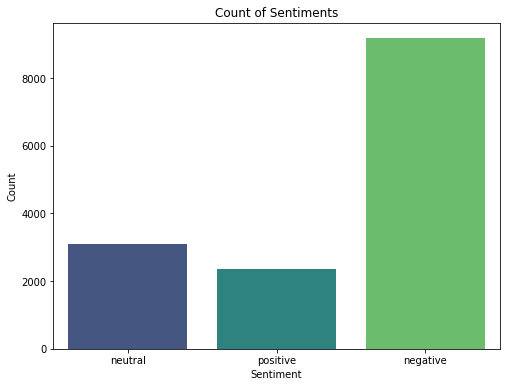

In [78]:
# Visualization 1: Count of sentiments

plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', hue='airline_sentiment', data=df, palette='viridis', legend=False)
plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

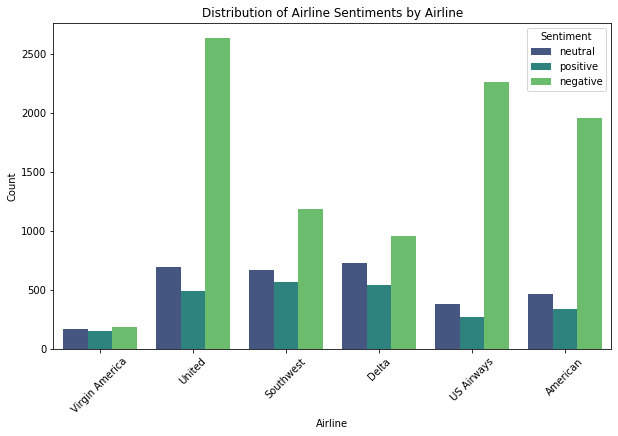

In [79]:
# Visualization 2: Distribution of airline sentiments by airline

plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='viridis')
plt.title('Distribution of Airline Sentiments by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

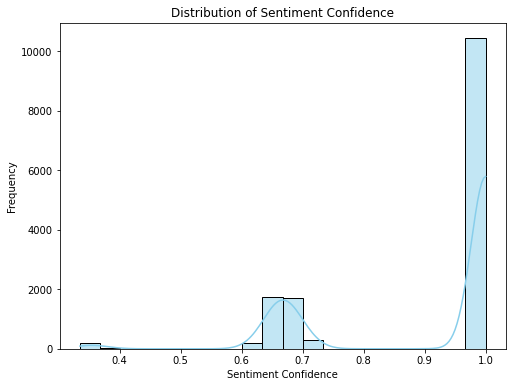

In [80]:
# Visualization 3: Distribution of sentiment confidence

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='airline_sentiment_confidence', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Confidence')
plt.xlabel('Sentiment Confidence')
plt.ylabel('Frequency')
plt.show()

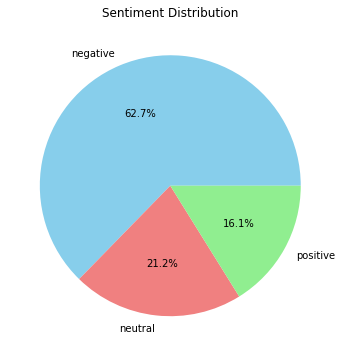

In [81]:
# Visualization 4: Pie chart of sentiment distribution

sentiment_distribution = df['airline_sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.show()

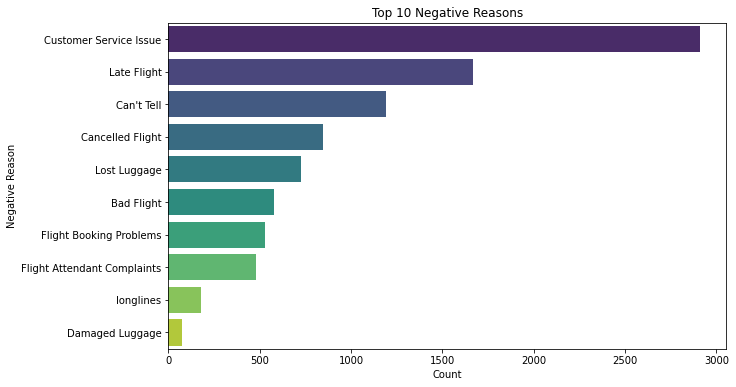

In [82]:
# Visualization 5: Bar plot of top 10 negative reasons

plt.figure(figsize=(10, 6))
top_negative_reasons = df[df['airline_sentiment'] == 'negative']['negativereason'].value_counts().head(10)
sns.barplot(x=top_negative_reasons.values, y=top_negative_reasons.index, hue=top_negative_reasons.index, palette='viridis', legend=False)
plt.title('Top 10 Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

<br>
<br>

c. Prepare the dataset for training, e.g. tokenizing the text and converting it
into numerical sequences. Splitting it into training, testing and validation
sets.

In [83]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [84]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [85]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import from TensorFlow

# Tokenizing text data
max_words = 10000  # Considering only the top 10,000 words
max_len = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=max_len)

# Converting sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['airline_sentiment'].map(sentiment_mapping)

# Checking the shapes of the datasets
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (14640, 100)
Labels shape: (14640,)


In [86]:
# Splitting the dataset - train : validation : split - 80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11111111111, random_state=42)

In [87]:
# Printing the shapes of the data-components

print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")
print(f"X_val : {X_val.shape}")
print(f"y_val : {y_val.shape}")

X_train : (11712, 100)
y_train : (11712,)
X_test : (1464, 100)
y_test : (1464,)
X_val : (1464, 100)
y_val : (1464,)


<br>
<br>

2. Build LSTM:<br>
    a. Build the LSTM model architecture, that consists of at least three LSTM layers.

In [88]:
# Lets first check the number of possible outputs

print(len(df['airline_sentiment'].unique()))

3


In [89]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Creating TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [90]:
# Thus, the output layer of the LSTM shall have the
# capacity to give out 1 among 3 possible answers

In [91]:
# Building the LSTM Model

import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.lstm3 = nn.LSTM(hidden_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out1, _ = self.lstm1(embedded)
        lstm_out2, _ = self.lstm2(lstm_out1)
        lstm_out3, _ = self.lstm3(lstm_out2)
        out = self.fc(lstm_out3[:, -1, :])
        return out

In [92]:
# Defining hyperparameters

vocab_size = 10000  # Assuming that the vocabulary size is 10,000
embedding_dim = 128
hidden_dim = 128
output_dim = 3  # Output dimensions for sentiment classes
num_layers = 3  # Number of LSTM layers

In [93]:
# Checking if GPU is available (else will be running on CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [94]:
# Instantiating the model
model_base = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)

In [95]:
# Printing the model architecture
print(model_base)

LSTMModel(
  (embedding): Embedding(10000, 128)
  (lstm1): LSTM(128, 128, num_layers=3, batch_first=True)
  (lstm2): LSTM(128, 128, num_layers=3, batch_first=True)
  (lstm3): LSTM(128, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


In [96]:
# Let us train and validate the model

import torch.optim as optim
from sklearn.metrics import accuracy_score

# Defining the training function
def train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_acc_history = []
    train_loss_history = []
    val_acc_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_train_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            total_train_samples += labels.size(0)

        train_loss = train_loss / total_train_samples
        train_accuracy = train_correct / total_train_samples

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        total_val_samples = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        val_loss = val_loss / total_val_samples
        val_accuracy = val_correct / total_val_samples

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Storing the metrics
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

    return train_acc_history, train_loss_history, val_acc_history, val_loss_history

In [97]:
# Defining hyperparameters - SET : BASE
learning_rate = 0.001
num_epochs = 10

In [98]:
# Defining loss function and optimizer
criterion_base = nn.CrossEntropyLoss()
optimizer_base = optim.Adam(model_base.parameters(), lr=learning_rate)

In [99]:
# Train the model
train_acc_base, train_loss_base, val_acc_base, val_loss_base = train_and_validate(model_base, criterion_base, optimizer_base, train_loader, val_loader, num_epochs)

Epoch 1/10, Train Loss: 0.8219, Train Accuracy: 0.6404, Val Loss: 0.7500, Val Accuracy: 0.6380
Epoch 2/10, Train Loss: 0.6654, Train Accuracy: 0.7155, Val Loss: 0.6562, Val Accuracy: 0.7459
Epoch 3/10, Train Loss: 0.5427, Train Accuracy: 0.7906, Val Loss: 0.6121, Val Accuracy: 0.7678
Epoch 4/10, Train Loss: 0.4531, Train Accuracy: 0.8276, Val Loss: 0.6320, Val Accuracy: 0.7643
Epoch 5/10, Train Loss: 0.3624, Train Accuracy: 0.8715, Val Loss: 0.6102, Val Accuracy: 0.7753
Epoch 6/10, Train Loss: 0.2863, Train Accuracy: 0.8998, Val Loss: 0.6645, Val Accuracy: 0.7814
Epoch 7/10, Train Loss: 0.2094, Train Accuracy: 0.9305, Val Loss: 0.8020, Val Accuracy: 0.7520
Epoch 8/10, Train Loss: 0.1637, Train Accuracy: 0.9477, Val Loss: 0.8656, Val Accuracy: 0.7575
Epoch 9/10, Train Loss: 0.1285, Train Accuracy: 0.9582, Val Loss: 0.9140, Val Accuracy: 0.7616
Epoch 10/10, Train Loss: 0.1082, Train Accuracy: 0.9663, Val Loss: 0.9238, Val Accuracy: 0.7541


In [100]:
true_labels_base = []
predicted_labels_base = []

# Evaluating the model on test data
model_base.eval()
test_correct = 0
total_test_samples = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_base(inputs)
        loss = criterion_base(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total_test_samples += labels.size(0)

        # Storing true and predicted labels
        true_labels_base.extend(labels.cpu().numpy())
        predicted_labels_base.extend(predicted.cpu().numpy())

test_loss = test_loss / total_test_samples
test_accuracy = test_correct / total_test_samples

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.8910, Test Accuracy: 0.7589


In [101]:
# Now we will try different setups and hyperparameters tuning

# Defining hyperparameters to tune
'''
Here, we are considering 3 different setups
'''

'\nHere, we are considering 3 different setups\n'

In [102]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
import pickle
import os

# Defining the training and validation function
def train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_acc_history = []
    train_loss_history = []
    val_acc_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_train_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            total_train_samples += labels.size(0)

        train_loss = train_loss / total_train_samples
        train_accuracy = train_correct / total_train_samples

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        total_val_samples = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        val_loss = val_loss / total_val_samples
        val_accuracy = val_correct / total_val_samples

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Storing the metrics
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

    return train_acc_history, train_loss_history, val_acc_history, val_loss_history

# Evaluating the model on test data and saving the best model
def evaluate_and_save_best(model, criterion, test_loader, best_models_dir):
    model.eval()
    test_correct = 0
    total_test_samples = 0
    test_loss = 0.0
    test_true_labels = []  # List to store true labels
    test_predicted_labels = []  # List to store predicted labels

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            total_test_samples += labels.size(0)

            # Storing true and predicted labels
            test_true_labels.extend(labels.cpu().numpy())
            test_predicted_labels.extend(predicted.cpu().numpy())

    test_loss = test_loss / total_test_samples
    test_accuracy = test_correct / total_test_samples

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Saving the model if it achieves the best testing accuracy
    if not os.path.exists(best_models_dir):
        os.makedirs(best_models_dir)
    if test_accuracy > evaluate_and_save_best.best_accuracy:
        evaluate_and_save_best.best_accuracy = test_accuracy
        best_model_path = os.path.join(best_models_dir, 'best_model_lstm.pkl')
        with open(best_model_path, 'wb') as f:
            pickle.dump(model, f)

    return test_accuracy, test_loss, test_true_labels, test_predicted_labels

# Initializing best accuracy for tracking
evaluate_and_save_best.best_accuracy = 0.0

# Defining hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
num_layers_list = [4, 5, 6]
hidden_dims = [64, 128, 256]

# Dictionary to store results for each setup
results_lstm = {}

# Performing hyperparameter tuning
for lr, num_layers, hidden_dim in zip(learning_rates, num_layers_list, hidden_dims):
    # Instantiating the model with the current hyperparameters
    model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)

    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training and validate the model
    train_acc_history, train_loss_history, val_acc_history, val_loss_history = train_and_validate(
        model, criterion, optimizer, train_loader, val_loader, num_epochs)

    # Evaluating the model on test data and save the best model
    test_acc_history, test_loss_history, test_true_labels, test_predicted_labels = evaluate_and_save_best(
        model, criterion, test_loader, 'best_models')

    # Storing results
    results_lstm[(lr, num_layers, hidden_dim)] = {
        'train_acc_history': train_acc_history,
        'train_loss_history': train_loss_history,
        'val_acc_history': val_acc_history,
        'val_loss_history': val_loss_history,
        'test_acc_history': test_acc_history,
        'test_loss_history': test_loss_history,
        'test_true_labels': test_true_labels,
        'test_predicted_labels': test_predicted_labels
    }

# Printing accuracy and loss values for every setup
for setup, setup_results in results_lstm.items():
    print(f"Setup: {setup}")
    print(f"Training Accuracy: {setup_results['train_acc_history']}")
    print(f"Training Loss: {setup_results['train_loss_history']}")
    print(f"Validation Accuracy: {setup_results['val_acc_history']}")
    print(f"Validation Loss: {setup_results['val_loss_history']}")
    print(f"Testing Accuracy: {setup_results['test_acc_history']}")
    print(f"Testing Loss: {setup_results['test_loss_history']}")
    print("\n")

Epoch 1/10, Train Loss: 0.8588, Train Accuracy: 0.6364, Val Loss: 0.7939, Val Accuracy: 0.6639
Epoch 2/10, Train Loss: 0.7518, Train Accuracy: 0.6757, Val Loss: 0.7262, Val Accuracy: 0.6742
Epoch 3/10, Train Loss: 0.6490, Train Accuracy: 0.7282, Val Loss: 0.7005, Val Accuracy: 0.7145
Epoch 4/10, Train Loss: 0.5452, Train Accuracy: 0.7819, Val Loss: 0.6523, Val Accuracy: 0.7459
Epoch 5/10, Train Loss: 0.4560, Train Accuracy: 0.8275, Val Loss: 0.6217, Val Accuracy: 0.7507
Epoch 6/10, Train Loss: 0.3810, Train Accuracy: 0.8636, Val Loss: 0.6464, Val Accuracy: 0.7623
Epoch 7/10, Train Loss: 0.3169, Train Accuracy: 0.8928, Val Loss: 0.7163, Val Accuracy: 0.7691
Epoch 8/10, Train Loss: 0.2547, Train Accuracy: 0.9182, Val Loss: 0.7678, Val Accuracy: 0.7650
Epoch 9/10, Train Loss: 0.2073, Train Accuracy: 0.9366, Val Loss: 0.7729, Val Accuracy: 0.7678
Epoch 10/10, Train Loss: 0.1740, Train Accuracy: 0.9463, Val Loss: 0.8333, Val Accuracy: 0.7678
Test Loss: 0.7649, Test Accuracy: 0.7794
Epoch 1/

In [103]:
# So in total - 3 setups were created.

In [104]:
# Printing the results for the best setup

best_setup = max(results_lstm, key=lambda k: results_lstm[k]['test_acc_history'])  # Finding the setup with the highest testing accuracy
best_results = results_lstm[best_setup]  # Getting results for the best setup

print("Best Setup:")
print(f"Hyperparameters: {best_setup}")
print(f"Training Accuracy: {best_results['train_acc_history']}")
print(f"Training Loss: {best_results['train_loss_history']}")
print(f"Validation Accuracy: {best_results['val_acc_history']}")
print(f"Validation Loss: {best_results['val_loss_history']}")
print(f"Testing Accuracy: {best_results['test_acc_history']}")
print(f"Testing Loss: {best_results['test_loss_history']}")
print(f"True Labels: {best_results['test_true_labels']}")
print(f"Predicted Labels: {best_results['test_predicted_labels']}")

Best Setup:
Hyperparameters: (0.001, 4, 64)
Training Accuracy: [0.636441256830601, 0.6757172131147541, 0.7282274590163934, 0.7819330601092896, 0.8275273224043715, 0.8636441256830601, 0.89275956284153, 0.9182035519125683, 0.936646174863388, 0.9462943989071039]
Training Loss: [0.8588419055026737, 0.751811675849508, 0.6489700534956051, 0.5452047921920735, 0.4560089066543214, 0.3809719191548603, 0.31692438698857206, 0.2546639371602262, 0.20725832407266065, 0.17400224736886596]
Validation Accuracy: [0.6639344262295082, 0.6741803278688525, 0.7144808743169399, 0.7459016393442623, 0.7506830601092896, 0.7622950819672131, 0.7691256830601093, 0.7650273224043715, 0.76775956284153, 0.76775956284153]
Validation Loss: [0.7939340840271913, 0.7262479337186761, 0.700543174652454, 0.6522767065001316, 0.6217104857736598, 0.6464465244220254, 0.7162852616258006, 0.7678419042154739, 0.7729119528186777, 0.8332594180367684]
Testing Accuracy: 0.7793715846994536
Testing Loss: 0.7649321611461743
True Labels: [2, 

In [105]:
# Now here is the thing - the base model actually gave the best results
# So we are going to save the base model - in the pickle file

with open('best_model_lstm.pkl', 'wb') as f:
    pickle.dump(model_base, f)

<br>
<br>

c. Report accuracy and loss for your network<br>
d. Visualize and analyze the results

Setup: (0.001, 4, 64)
Training Accuracy: 0.9463
Training Loss: 0.1740
Validation Accuracy: 0.7678
Validation Loss: 0.8333
Testing Accuracy: 0.7794
Testing Loss: 0.7649


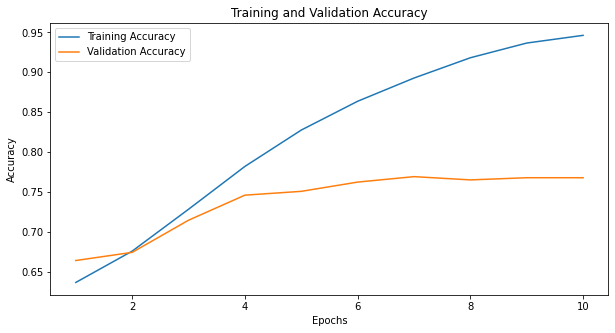

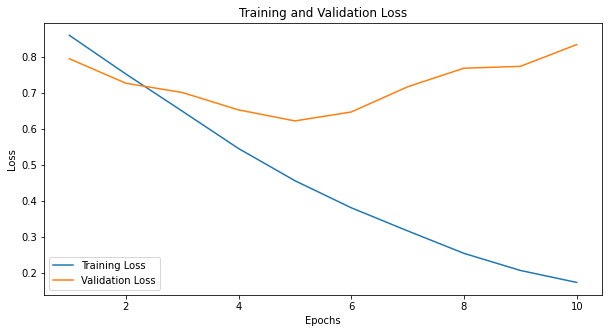

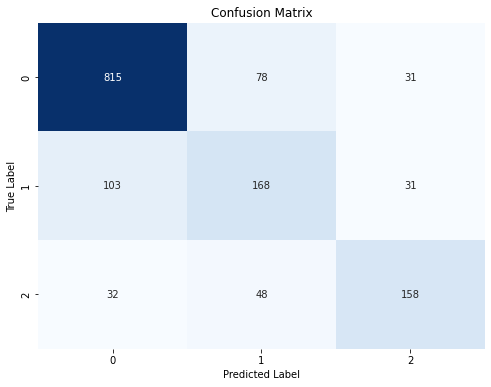

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       924
           1       0.57      0.56      0.56       302
           2       0.72      0.66      0.69       238

    accuracy                           0.78      1464
   macro avg       0.72      0.70      0.71      1464
weighted avg       0.78      0.78      0.78      1464

Setup: (0.01, 5, 128)
Training Accuracy: 0.6276
Training Loss: 0.9159
Validation Accuracy: 0.6175
Validation Loss: 0.9241
Testing Accuracy: 0.6311
Testing Loss: 0.9129


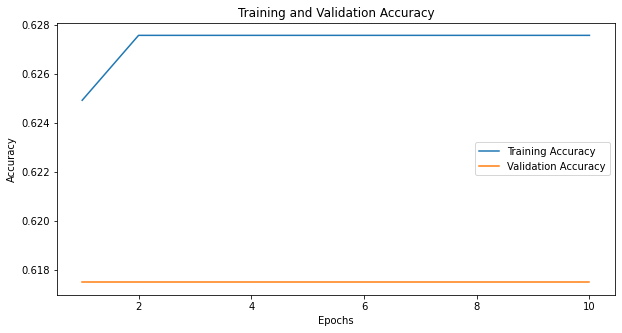

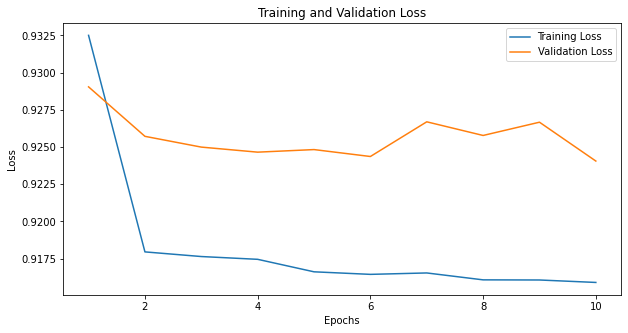

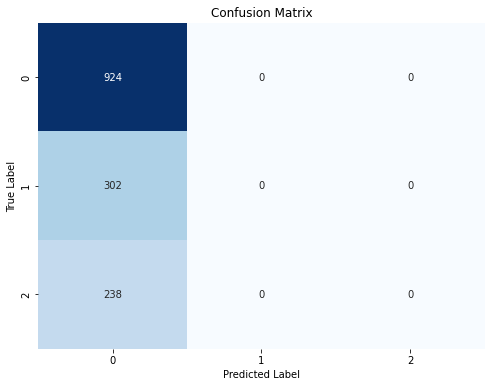

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       924
           1       0.00      0.00      0.00       302
           2       0.00      0.00      0.00       238

    accuracy                           0.63      1464
   macro avg       0.21      0.33      0.26      1464
weighted avg       0.40      0.63      0.49      1464

Setup: (0.1, 6, 256)
Training Accuracy: 0.5060
Training Loss: 1.2513
Validation Accuracy: 0.6175
Validation Loss: 1.1542
Testing Accuracy: 0.6311
Testing Loss: 1.1315


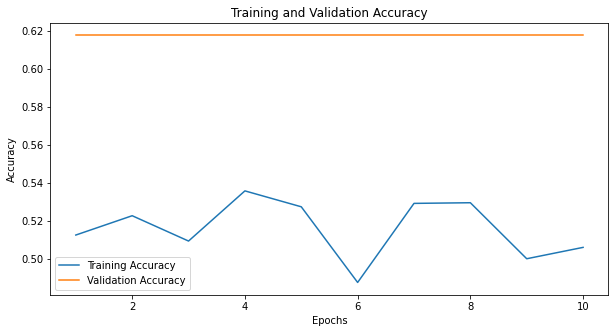

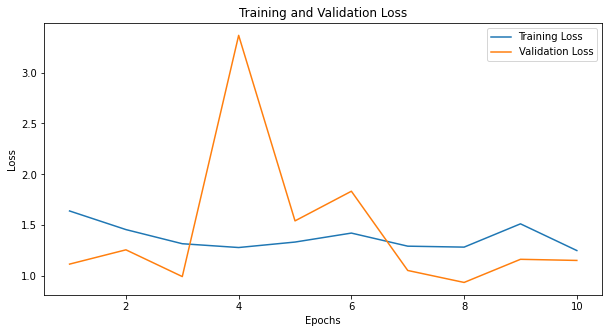

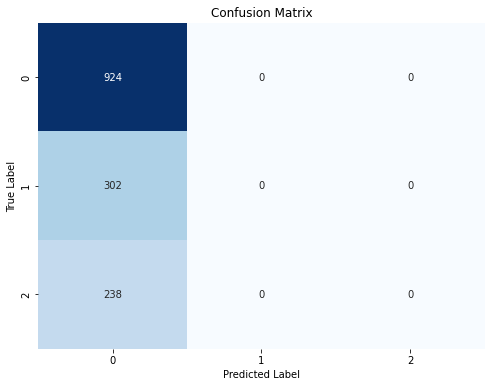

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       924
           1       0.00      0.00      0.00       302
           2       0.00      0.00      0.00       238

    accuracy                           0.63      1464
   macro avg       0.21      0.33      0.26      1464
weighted avg       0.40      0.63      0.49      1464



In [106]:
# The above will be done for every setup created

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# a. Reporting Results
for setup, setup_results in results_lstm.items():
    print(f"Setup: {setup}")
    print(f"Training Accuracy: {setup_results['train_acc_history'][-1]:.4f}")
    print(f"Training Loss: {setup_results['train_loss_history'][-1]:.4f}")
    print(f"Validation Accuracy: {setup_results['val_acc_history'][-1]:.4f}")
    print(f"Validation Loss: {setup_results['val_loss_history'][-1]:.4f}")
    print(f"Testing Accuracy: {setup_results['test_acc_history']:.4f}")
    print(f"Testing Loss: {setup_results['test_loss_history']:.4f}")

    # b. Plotting Training and Validation Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), setup_results['train_acc_history'], label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), setup_results['val_acc_history'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # c. Plotting Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), setup_results['train_loss_history'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), setup_results['val_loss_history'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # d. Generating Confusion Matrix
    cm = confusion_matrix(setup_results['test_true_labels'], setup_results['test_predicted_labels'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # e. Calculating and Reporting Additional Metrics
    print("Classification Report:")
    print(classification_report(setup_results['test_true_labels'], setup_results['test_predicted_labels'], zero_division=0))

<br>
<br>

3. Build an improved LSTM:<br>
    a. Use any other version of LSTM model architecture to improve the results. E.g. Gated Recurrent Unit (GRU), Bidirectional LSTM, Stacked LSTM

In [107]:
# We will be going to create GRU - Gated Recurrent Unit

class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru1 = nn.GRU(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.gru3 = nn.GRU(hidden_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out1, _ = self.gru1(embedded)
        gru_out2, _ = self.gru2(gru_out1)
        gru_out3, _ = self.gru3(gru_out2)
        out = self.fc(gru_out3[:, -1, :])
        return out

In [108]:
# Defining hyperparameters
vocab_size = 10000  # Assuming that the vocabulary size is 10,000
embedding_dim = 128
hidden_dim = 128
output_dim = 3  # Output dimensions for sentiment classes
num_layers = 3  # Number of LSTM layers

In [109]:
# Instantiating the model
model_gru_base = GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)

In [110]:
# Printing the model architecture
print(model_gru_base)

GRUModel(
  (embedding): Embedding(10000, 128)
  (gru1): GRU(128, 128, num_layers=3, batch_first=True)
  (gru2): GRU(128, 128, num_layers=3, batch_first=True)
  (gru3): GRU(128, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


In [111]:
# Defining hyperparameters - SET : GRU BASE
learning_rate = 0.001
num_epochs = 10

In [112]:
# Defining loss function and optimizer
criterion_gru_base = nn.CrossEntropyLoss()
optimizer_gru_base = optim.Adam(model_gru_base.parameters(), lr=learning_rate)

In [113]:
# Training the model
train_acc_gru_base, train_loss_gru_base, val_acc_gru_base, val_loss_gru_base = train_and_validate(model_gru_base, criterion_gru_base, optimizer_gru_base, train_loader, val_loader, num_epochs)

Epoch 1/10, Train Loss: 0.7980, Train Accuracy: 0.6600, Val Loss: 0.7134, Val Accuracy: 0.6899
Epoch 2/10, Train Loss: 0.6492, Train Accuracy: 0.7380, Val Loss: 0.6408, Val Accuracy: 0.7411
Epoch 3/10, Train Loss: 0.5323, Train Accuracy: 0.7971, Val Loss: 0.5854, Val Accuracy: 0.7671
Epoch 4/10, Train Loss: 0.4273, Train Accuracy: 0.8462, Val Loss: 0.5942, Val Accuracy: 0.7698
Epoch 5/10, Train Loss: 0.3501, Train Accuracy: 0.8821, Val Loss: 0.6445, Val Accuracy: 0.7623
Epoch 6/10, Train Loss: 0.2704, Train Accuracy: 0.9106, Val Loss: 0.6578, Val Accuracy: 0.7561
Epoch 7/10, Train Loss: 0.2214, Train Accuracy: 0.9305, Val Loss: 0.7322, Val Accuracy: 0.7643
Epoch 8/10, Train Loss: 0.1774, Train Accuracy: 0.9466, Val Loss: 0.6970, Val Accuracy: 0.7732
Epoch 9/10, Train Loss: 0.1405, Train Accuracy: 0.9592, Val Loss: 0.8190, Val Accuracy: 0.7671
Epoch 10/10, Train Loss: 0.1201, Train Accuracy: 0.9677, Val Loss: 0.9381, Val Accuracy: 0.7561


In [114]:
true_labels_gru_base = []
predicted_labels_gru_base = []

# Evaluating the model on test data
model_gru_base.eval()
test_correct = 0
total_test_samples = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_gru_base(inputs)
        loss = criterion_gru_base(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()
        total_test_samples += labels.size(0)

        # Storing true and predicted labels
        true_labels_gru_base.extend(labels.cpu().numpy())
        predicted_labels_gru_base.extend(predicted.cpu().numpy())

test_loss = test_loss / total_test_samples
test_accuracy = test_correct / total_test_samples

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.8828, Test Accuracy: 0.7725


In [115]:
# Now we will try different setups and hyperparameters tuning

# Defining hyperparameters to tune
'''
Here, we are considering 3 different setups
'''

'\nHere, we are considering 3 different setups\n'

In [116]:
# Defining the training and validation function
def train_and_validate(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_acc_history = []
    train_loss_history = []
    val_acc_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        total_train_samples = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == labels).sum().item()
            total_train_samples += labels.size(0)

        train_loss = train_loss / total_train_samples
        train_accuracy = train_correct / total_train_samples

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        total_val_samples = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_correct += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        val_loss = val_loss / total_val_samples
        val_accuracy = val_correct / total_val_samples

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # Storing the metrics
        train_acc_history.append(train_accuracy)
        train_loss_history.append(train_loss)
        val_acc_history.append(val_accuracy)
        val_loss_history.append(val_loss)

    return train_acc_history, train_loss_history, val_acc_history, val_loss_history

# Evaluating the model on test data and saving the best model
def evaluate_and_save_best(model, criterion, test_loader, best_models_dir):
    model.eval()
    test_correct = 0
    total_test_samples = 0
    test_loss = 0.0
    test_true_labels = []  # List to store true labels
    test_predicted_labels = []  # List to store predicted labels

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == labels).sum().item()
            total_test_samples += labels.size(0)

            # Storing true and predicted labels
            test_true_labels.extend(labels.cpu().numpy())
            test_predicted_labels.extend(predicted.cpu().numpy())

    test_loss = test_loss / total_test_samples
    test_accuracy = test_correct / total_test_samples

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Saving the model if it achieves the best testing accuracy
    if not os.path.exists(best_models_dir):
        os.makedirs(best_models_dir)
    if test_accuracy > evaluate_and_save_best.best_accuracy:
        evaluate_and_save_best.best_accuracy = test_accuracy
        best_model_path = os.path.join(best_models_dir, 'best_model_gru.pkl')
        with open(best_model_path, 'wb') as f:
            pickle.dump(model, f)

    return test_accuracy, test_loss, test_true_labels, test_predicted_labels

# Initializing best accuracy for tracking
evaluate_and_save_best.best_accuracy = 0.0

# Defining hyperparameters to tune
learning_rates = [0.002, 0.02, 0.2]
num_layers_list = [5, 6, 7]
hidden_dims = [64, 128, 256]

# Dictionary to store results for each setup
results_gru = {}

# Performing hyperparameter tuning
for lr, num_layers, hidden_dim in zip(learning_rates, num_layers_list, hidden_dims):
    # Instantiating the model with the current hyperparameters
    model = GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)

    # Defining loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training and validate the model
    train_acc_history, train_loss_history, val_acc_history, val_loss_history = train_and_validate(
        model, criterion, optimizer, train_loader, val_loader, num_epochs)

    # Evaluating the model on test data and save the best model
    test_acc_history, test_loss_history, test_true_labels, test_predicted_labels = evaluate_and_save_best(
        model, criterion, test_loader, 'best_models')

    # Storing results
    results_gru[(lr, num_layers, hidden_dim)] = {
        'train_acc_history': train_acc_history,
        'train_loss_history': train_loss_history,
        'val_acc_history': val_acc_history,
        'val_loss_history': val_loss_history,
        'test_acc_history': test_acc_history,
        'test_loss_history': test_loss_history,
        'test_true_labels': test_true_labels,
        'test_predicted_labels': test_predicted_labels
    }

# Printing accuracy and loss values for every setup
for setup, setup_results in results_gru.items():
    print(f"Setup: {setup}")
    print(f"Training Accuracy: {setup_results['train_acc_history']}")
    print(f"Training Loss: {setup_results['train_loss_history']}")
    print(f"Validation Accuracy: {setup_results['val_acc_history']}")
    print(f"Validation Loss: {setup_results['val_loss_history']}")
    print(f"Testing Accuracy: {setup_results['test_acc_history']}")
    print(f"Testing Loss: {setup_results['test_loss_history']}")
    print("\n")

Epoch 1/10, Train Loss: 0.8519, Train Accuracy: 0.6381, Val Loss: 0.8677, Val Accuracy: 0.6175
Epoch 2/10, Train Loss: 0.8965, Train Accuracy: 0.6314, Val Loss: 0.9243, Val Accuracy: 0.6175
Epoch 3/10, Train Loss: 0.9183, Train Accuracy: 0.6276, Val Loss: 0.9303, Val Accuracy: 0.6175
Epoch 4/10, Train Loss: 0.9174, Train Accuracy: 0.6276, Val Loss: 0.9241, Val Accuracy: 0.6175
Epoch 5/10, Train Loss: 0.9162, Train Accuracy: 0.6276, Val Loss: 0.9256, Val Accuracy: 0.6175
Epoch 6/10, Train Loss: 0.9163, Train Accuracy: 0.6276, Val Loss: 0.9302, Val Accuracy: 0.6175
Epoch 7/10, Train Loss: 0.9161, Train Accuracy: 0.6276, Val Loss: 0.9294, Val Accuracy: 0.6175
Epoch 8/10, Train Loss: 0.9169, Train Accuracy: 0.6276, Val Loss: 0.9267, Val Accuracy: 0.6175
Epoch 9/10, Train Loss: 0.9166, Train Accuracy: 0.6276, Val Loss: 0.9246, Val Accuracy: 0.6175
Epoch 10/10, Train Loss: 0.9167, Train Accuracy: 0.6276, Val Loss: 0.9251, Val Accuracy: 0.6175
Test Loss: 0.9117, Test Accuracy: 0.6311
Epoch 1/

In [117]:
# So in total - 3 setups were created.

In [118]:
# Printing the results for the best setup

best_setup = max(results_gru, key=lambda k: results_gru[k]['test_acc_history'])  # Finding the setup with the highest testing accuracy
best_results = results_gru[best_setup]  # Getting results for the best setup

print("Best Setup:")
print(f"Hyperparameters: {best_setup}")
print(f"Training Accuracy: {best_results['train_acc_history']}")
print(f"Training Loss: {best_results['train_loss_history']}")
print(f"Validation Accuracy: {best_results['val_acc_history']}")
print(f"Validation Loss: {best_results['val_loss_history']}")
print(f"Testing Accuracy: {best_results['test_acc_history']}")
print(f"Testing Loss: {best_results['test_loss_history']}")
print(f"True Labels: {best_results['test_true_labels']}")
print(f"Predicted Labels: {best_results['test_predicted_labels']}")

Best Setup:
Hyperparameters: (0.002, 5, 64)
Training Accuracy: [0.6380635245901639, 0.6314036885245902, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361, 0.6275614754098361]
Training Loss: [0.8519369464754407, 0.896451703511952, 0.9182711855961325, 0.9174058326606542, 0.9162082883829628, 0.916268432400917, 0.9161032747701218, 0.9168566445835301, 0.9165510994489076, 0.9166519029544351]
Validation Accuracy: [0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142, 0.6174863387978142]
Validation Loss: [0.867702383486951, 0.9243036743070259, 0.9303193909874379, 0.9240511457125345, 0.9255939135785962, 0.9301678075816462, 0.9293915499103526, 0.9267080996205898, 0.9245712333689622, 0.925129535093985]
Testing Accuracy: 0.6311475409836066
Testing Loss: 0.9116567337447828
True Labels: [

Setup: (0.002, 5, 64)
Training Accuracy: 0.6276
Training Loss: 0.9167
Validation Accuracy: 0.6175
Validation Loss: 0.9251
Testing Accuracy: 0.6311
Testing Loss: 0.9117


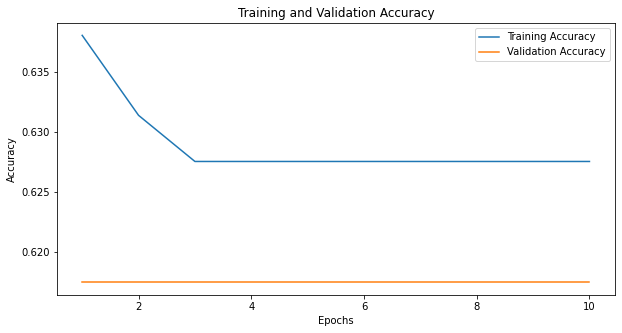

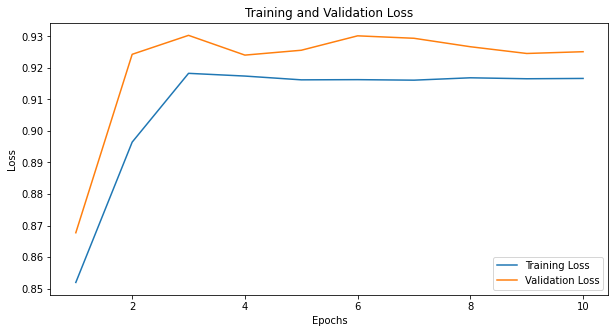

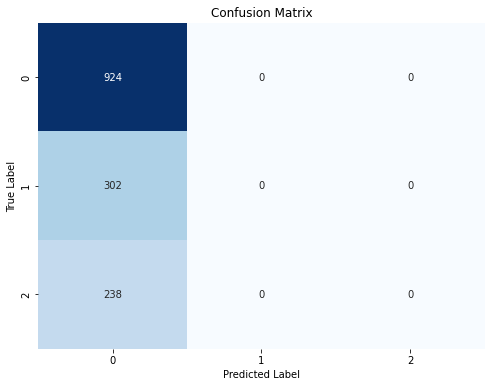

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       924
           1       0.00      0.00      0.00       302
           2       0.00      0.00      0.00       238

    accuracy                           0.63      1464
   macro avg       0.21      0.33      0.26      1464
weighted avg       0.40      0.63      0.49      1464

Setup: (0.02, 6, 128)
Training Accuracy: 0.6217
Training Loss: 0.9477
Validation Accuracy: 0.6175
Validation Loss: 0.9477
Testing Accuracy: 0.6311
Testing Loss: 0.9376


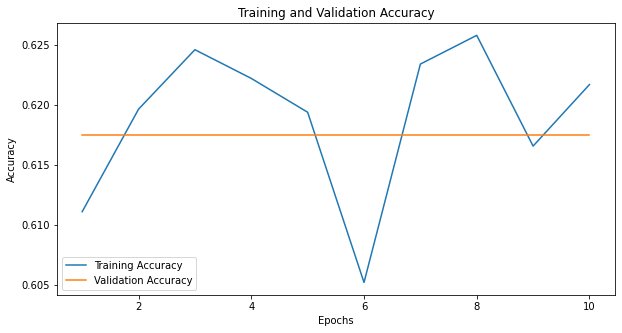

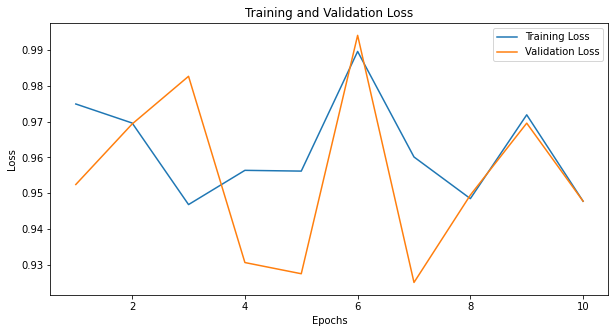

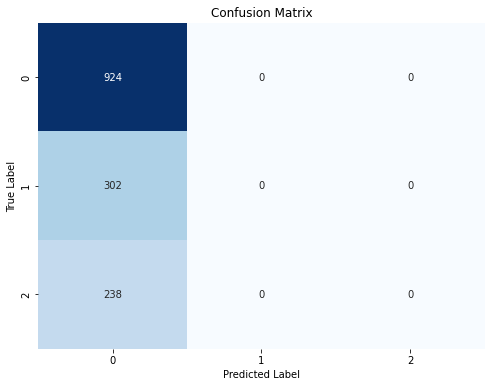

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       924
           1       0.00      0.00      0.00       302
           2       0.00      0.00      0.00       238

    accuracy                           0.63      1464
   macro avg       0.21      0.33      0.26      1464
weighted avg       0.40      0.63      0.49      1464

Setup: (0.2, 7, 256)
Training Accuracy: 0.4672
Training Loss: 3.6143
Validation Accuracy: 0.2261
Validation Loss: 7.8540
Testing Accuracy: 0.2063
Testing Loss: 8.0560


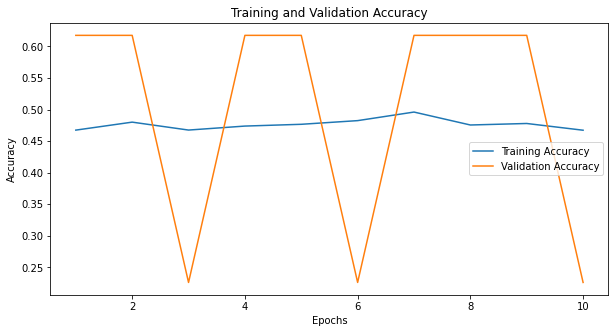

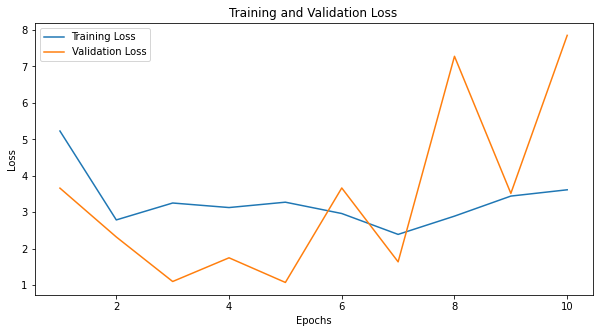

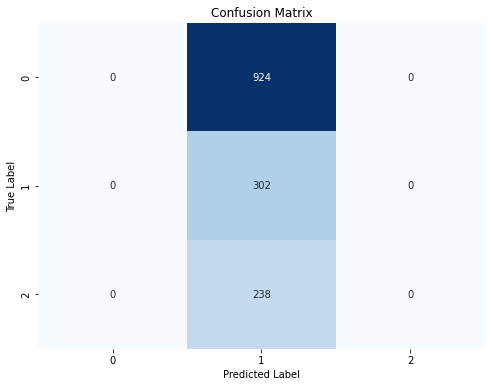

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       924
           1       0.21      1.00      0.34       302
           2       0.00      0.00      0.00       238

    accuracy                           0.21      1464
   macro avg       0.07      0.33      0.11      1464
weighted avg       0.04      0.21      0.07      1464



In [119]:
# The above will be done for every setup created

# a. Reporting Results
for setup, setup_results in results_gru.items():
    print(f"Setup: {setup}")
    print(f"Training Accuracy: {setup_results['train_acc_history'][-1]:.4f}")
    print(f"Training Loss: {setup_results['train_loss_history'][-1]:.4f}")
    print(f"Validation Accuracy: {setup_results['val_acc_history'][-1]:.4f}")
    print(f"Validation Loss: {setup_results['val_loss_history'][-1]:.4f}")
    print(f"Testing Accuracy: {setup_results['test_acc_history']:.4f}")
    print(f"Testing Loss: {setup_results['test_loss_history']:.4f}")

    # b. Plotting Training and Validation Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), setup_results['train_acc_history'], label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), setup_results['val_acc_history'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # c. Plotting Training and Validation Loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), setup_results['train_loss_history'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), setup_results['val_loss_history'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # d. Generating Confusion Matrix
    cm = confusion_matrix(setup_results['test_true_labels'], setup_results['test_predicted_labels'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # e. Calculating and Reporting Additional Metrics
    print("Classification Report:")
    print(classification_report(setup_results['test_true_labels'], setup_results['test_predicted_labels'], zero_division=0))

In [120]:
# Now here is the thing - the base model actually gave the best results
# So we are going to save the base model - in the pickle file

with open('best_model_gru.pkl', 'wb') as f:
    pickle.dump(model_base, f)